Tue Doan, Nahom Ketema, Long Chung, Keaton Spiller

CS441

Spring 2022

Final Project

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
def initialize_board(output):
  '''
  {Initial Configuration of the Othello Board}
  Input: True/False to print initial board
  returns: 8x8 Numpy Array Board Configuration
  1 for Player1
  2 for Player2
  9 for empty board state
  '''
  board = np.full((8,8), 9)
  board[3][4] = 1
  board[4][3] = 1
  board[3][3] = 2
  board[4][4] = 2
  if(output == True):
    print(f"Initial Configuration:\n{pd.DataFrame(board)}")
  return board
  
def surrounding_square(move):
  '''
  Input: position (row,column)
  Outputs: list of surrounding square around position
  '''
  square = []

  row = move[0]
  column = move[1]

  row_up = row + 1
  row_down = row - 1 
  column_right = column + 1
  column_left = column - 1

  # Up
  if(row_up < 8 ):
    square.append((row_up, column))
  
  # Down
  if(row_down > -1 ):
    square.append((row_down, column))

  # Left
  if(column_left > -1 ):
    square.append((row, column_left))

  # Right
  if(column_right < 8 ):
    square.append((row, column_right))

  # Diagonal up right
  if(column_right < 8 and row_up < 8):
    square.append((row_up, column_right))

  # Diagonal up Left
  if(column_left > -1 and row_up < 8):
    square.append((row_up, column_left))

  # Diagonal down right
  if(column_right < 8 and row_down > -1):
    square.append((row_down, column_right))

  # Diagonal down left
  if(column_left > -1 and row_down > -1):
    square.append((row_down, column_left))
    
  return (square)

def surrounding_player(board, move, player):
  '''
  Input: current board state, current move = (row,column), current player( 1 or 2 )
  returns: True or False
  True if 1's are surrounding position or if there are no opponent pieces surrounding move
  else returns False
  '''
  row = move[0]
  column = move[1]
  row_up = row + 1
  row_down = row - 1 
  column_right = column + 1
  column_left = column - 1
  surrounding = True
  possible = False
  
  if(player == 2):
    opposing = 1
  if(player == 1):
    opposing = 2
    
  # Up
  if(row_up < 8 ):
    if(board[row_up][column] != player):
      surrounding = False
    if(board[row_up][column] == opposing):
      possible = True
  # Down
  if(row_down > -1 ):
    if(board[row_down][column] != player):
      surrounding = False
    if(board[row_down][column] == opposing):
      possible = True
    
  # Left
  if(column_left > -1 ):
    if(board[row][column_left] != player):
      surrounding = False
    if(board[row][column_left] == opposing):
      possible = True

  # Right
  if(column_right < 8 ):
    if(board[row][column_right] != player):
      surrounding = False
    if(board[row][column_right] == opposing):
      possible = True

  # Diagonal up right
  if(column_right < 8 and row_up < 8):
    if(board[row_up][column_right] != player):
      surrounding = False
    if(board[row_up][column_right] == opposing):
      possible = True

  # Diagonal up Left
  if(column_left > -1 and row_up < 8):
    if(board[row_up][column_left] != player):
      surrounding = False
    if(board[row_up][column_left] == opposing):
      possible = True

  # Diagonal down right
  if(column_right < 8 and row_down > -1):
    if(board[row_down][column_right] != player):
      surrounding = False
    if(board[row_down][column_right] == opposing):
      possible = True

  # Diagonal down left
  if(column_left > -1 and row_down > -1):
    if(board[row_down][column_left] != player):
      surrounding = False
    if(board[row_down][column_left] == opposing):
      possible = True
      
  if(possible == False):
    return (True)
  return (surrounding)

def possible_flanks(move, board, player):
  '''
  Input: current move = (row,column), current board state, current player( 1 or 2 )
  Outputs: list of possible actions (flanks) of potential (col,row) to be flipped
  '''
  if(player == 2):
    opposing = 1
  if(player == 1):
    opposing = 2
  n = len(board)
  row = move[0]
  column = move[1]
  total_chain = []

  square = surrounding_square((row,column))
  for piece in square:
    row2 = piece[0]
    column2 = piece[1]
    tile2 = board[row2][column2]
    # Is there a player two tile alongside a player one tile
    if(tile2 == opposing and tile2 != 9): # player two 
      # for loop to check all other tiles against tile 2
      key = ((row,column,row2,column2))

      # Directly Vertical from player 1 tile
      if(row2 != row and column2 == column):
        # Vertical Up
        chain = []
        row_up = row2+1
        if(row_up < 8):
          if((row2, column2) not in total_chain and board[row_up][column2] == player):
            total_chain.append((row2, column2))
        if(row2 > row):
          if(row_up < 8):
            if(board[row_up][column2] == opposing):
              chain.append((row2, column2))
              while(row_up < 8): 
                if((board[row_up][column2] == opposing)):
                  chain.append((row_up, column2))
                if((board[row_up][column2] == player)):
                  for link in (chain):
                    if(link not in total_chain):
                      total_chain.append(link)
                if((board[row_up][column2] == 9)):
                  break
                row_up = row_up + 1

        # Vertical Down
        chain = []
        row_down = row2-1
        if(row_down > -1):
          if((row2, column2) not in total_chain and board[row_down][column2] == player):
            total_chain.append((row2, column2))
        if(row2 < row):
          if(row_down > -1):
            if(board[row_down][column2] == opposing):
              chain.append((row2, column2))
              while(row_down > -1): 
                if((board[row_down][column2] == opposing)):
                  chain.append((row_down, column2))
                if((board[row_down][column2] == player)):
                  for link in (chain):
                    if(link not in total_chain):
                      total_chain.append(link)
                if((board[row_down][column2] == 9)):
                  break
                row_down = row_down - 1   
      
      # Directly Horizontal from from player 1 tile
      if(row2 == row and column2 != column):

        # Horizontal Right
        chain = []
        column_right = column2 + 1
        if(column_right < 8):
          if((row2, column2) not in total_chain and board[row2][column_right] == player):
            total_chain.append((row2, column2))
        if(column2 > column):
          if(column_right < 8):
            if(board[row2][column_right] == opposing):
              chain.append((row2, column2))
              while(column_right < 8): 
                if((board[row2][column_right] == opposing)):
                  chain.append((row2, column_right))
                if((board[row2][column_right] == player)):
                  for link in (chain):
                    if(link not in total_chain):
                      total_chain.append(link)
                if((board[row2][column_right] == 9)):
                  break
                column_right = column_right + 1

        # Horizontal Left
        chain = []
        column_left = column2 - 1
        if(column_left > -1):
          if((row2, column2) not in total_chain and board[row2][column_left] == player):
            total_chain.append((row2, column2))
        if(column2 < column):
          if(column_left > -1):
            if(board[row2][column_left] == opposing):
              chain.append((row2, column2))
              while(column_left > -1): 
                if((board[row2][column_left] == opposing)):
                  chain.append((row2, column_left))
                if((board[row2][column_left] == player)):
                  for link in (chain):
                    if(link not in total_chain):
                      total_chain.append(link)
                if((board[row2][column_left] == 9)):
                  break
                column_left = column_left - 1

      # Directly Diagonal from from player 1 tile
      if(abs(column2-column) == abs(row2-row)):

        # Diagonal up and to the right
        chain = []
        row_up = row2 + 1
        column_right = column2 + 1
        if(row_up < 8 and column_right < 8):
          if((row2, column2) not in total_chain and board[row_up][column_right] == player):
            total_chain.append((row2, column2))
        if(row2 > row and column2 > column):
          if(row_up < 8 and column_right < 8 ):
            if(board[row_up][column_right] == opposing):
              chain.append((row2, column2))
              while(row_up < 8 and column_right < 8 ): 
                if((board[row_up][column_right] == opposing)):
                  chain.append((row_up, column_right))
                if((board[row_up][column_right] == player)):
                  for link in (chain):
                    if(link not in total_chain):
                      total_chain.append(link)
                if((board[row_up][column_right] == 9)):
                  break
                row_up = row_up + 1
                column_right = column_right + 1

        # Diagonal up and to the left
        chain = []
        row_up = row2 + 1
        column_left = column2 - 1
        if(row_up < 8 and column_left > -1):
          if((row2, column2) not in total_chain and board[row_up][column_left] == player):
            total_chain.append((row2, column2))
        if(row2 > row and column2 < column):
          if(row_up < 8 and column_left > -1):
            if(board[row_up][column_left] == opposing):
              chain.append((row2, column2))
              while(row_up < 8 and column_left > -1): 
                if((board[row_up][column_left] == opposing)):
                  chain.append((row_up, column_left))
                if((board[row_up][column_left] == player)):
                  for link in (chain):
                    if(link not in total_chain):
                      total_chain.append(link)
                if((board[row_up][column_left] == 9)):
                  break
                row_up = row_up + 1
                column_left = column_left - 1

        # Diagonal down and to the right
        chain = []
        column_right = column2 + 1
        row_down = row2-1
        if(row_down > -1 and column_right < 8):
          if((row2, column2) not in total_chain and board[row_down][column_right] == player):
            total_chain.append((row2, column2))
        if(row2 < row and column2 > column):
          if(column_right < 8 and row_down > -1):
            if(board[row_down][column_right] == opposing):
              chain.append((row2, column2))
              while(column_right < 8 and row_down > -1): 
                if((board[row_down][column_right] == opposing)):
                  chain.append((row_down, column_right))
                if((board[row_down][column_right] == player)):
                  for link in (chain):
                    if(link not in total_chain):
                      total_chain.append(link)
                if((board[row_down][column_right] == 9)):
                  break
                column_right = column_right + 1 
                row_down = row_down - 1

        # Diagonal down and to the left
        chain = []
        row_down = row2 - 1
        column_left = column2 - 1
        if(row_down > -1 and column_left > -1):
          if((row2, column2) not in total_chain and board[row_down][column_left] == player):
            total_chain.append((row2, column2))
        if(row2 < row and column2 < column):
          if(row_down > -1 and column_left > -1):
            if(board[row_down][column_left] == opposing):
              chain.append((row2, column2))
              while(row_down > -1 and column_left > -1): 
                if((board[row_down][column_left] == opposing)):
                  chain.append((row_down, column_left))
                if((board[row_down][column_left] == player)):
                  for link in (chain):
                    if(link not in total_chain):
                      total_chain.append(link)
                if((board[row_down][column_left] == 9)):
                  break
                row_down = row_down - 1
                column_left = column_left - 1
  # if(len(total_chain) >= 1):
  #   total_chain.append(move)    
  return (total_chain)

def possible_moves(row, column, board, player, heuristic):
  '''
  Input: current move = (row,column), current board state, current player( 1 or 2 )
  Outputs: best move = (row,column), list of state to be flipped from move = best_move_chain, score of best move = best_move_score
  '''
  if(player == 2):
    opposing = 1
  if(player == 1):
    opposing = 2
    
  best_move_score,best_move_score_all = 0,0
  best_move,best_move_chain = (),()
  best_move_all, best_move_chain_all  = (),()
  
  square = surrounding_square((row,column))
  for piece in square:
    row2 = piece[0]
    column2 = piece[1]
    tile2 = board[row2][column2]

    # Is there a player two tile alongside a player one tile
    if(tile2 == opposing): # player two 

        # Directly Vertical from player 1 tile
      if(row2 != row and column2 == column):

        # Vertical Up
        if(row2 > row):
          row_up = row2+1
          if(row_up < 8):
            if(board[row_up][column2] == 9):
              chain_of_actions = possible_flanks((row_up,column2), board, player)
              # apply heuristic
              if(len(chain_of_actions) > 0):
                best_move_score, best_move, best_move_chain = perform_heuristic(row_up, column2, board, player, opposing,
                                                                                      heuristic, chain_of_actions, best_move_score_all)
            if(board[row_up][column2] == opposing):
              while(row_up < 8): 
                if((board[row_up][column2] == 9)):
                  chain_of_actions = possible_flanks((row_up,column2), board, player)
                  # apply heuristic
                  if(len(chain_of_actions) > 0):
                    best_move_score, best_move, best_move_chain = perform_heuristic(row_up, column2, board, player, opposing,
                                                                                  heuristic, chain_of_actions, best_move_score_all)
                row_up = row_up + 1
        if(best_move_score > best_move_score_all):
          best_move_score_all = best_move_score
          best_move_all = best_move
          best_move_chain_all = best_move_chain
        # Vertical Down
        if(row2 < row):
          row_down = row2-1
          if(row_down > -1):
            if(board[row_down][column2] == 9):
              chain_of_actions = possible_flanks((row_down,column2), board, player)
              # apply heuristic
              if(len(chain_of_actions) > 0):
                best_move_score, best_move, best_move_chain = perform_heuristic(row_down, column2, board, player, opposing,
                                                                                      heuristic, chain_of_actions, best_move_score)
            if(board[row_down][column2] == opposing):
              while(row_down > -1): 
                if((board[row_down][column2] == 9)):
                  chain_of_actions = possible_flanks((row_down,column2), board, player)
                  # apply heuristic
                  if(len(chain_of_actions) > 0):
                    best_move_score, best_move, best_move_chain = perform_heuristic(row_down, column2, board, player, opposing,
                                                                                  heuristic, chain_of_actions, best_move_score)
                row_down = row_down - 1   
        if(best_move_score > best_move_score_all):
          best_move_score_all = best_move_score
          best_move_all = best_move
          best_move_chain_all = best_move_chain
      
      # Directly Horizontal from from player 1 tile
      if(row2 == row and column2 != column and (abs(column2-column) == 1) ):

        # Horizontal Right
        if(column2 > column):
          column_right = column2 + 1
          if(column_right < 8):
            if(board[row2][column_right] == 9):
              chain_of_actions = possible_flanks((row2,column_right), board, player)
              # apply heuristic
              if(len(chain_of_actions) > 0):
                best_move_score, best_move, best_move_chain = perform_heuristic(row2, column_right, board, player, opposing,
                                                                                      heuristic, chain_of_actions, best_move_score)
            if(board[row2][column_right] == opposing):
              while(column_right < 8): 
                if((board[row2][column_right] == 9)):
                  chain_of_actions = possible_flanks((row2,column_right), board, player)
                  # apply heuristic
                  if(len(chain_of_actions) > 0):
                    best_move_score, best_move, best_move_chain = perform_heuristic(row2, column_right, board, player, opposing,
                                                                                  heuristic, chain_of_actions, best_move_score)
                column_right = column_right + 1
        if(best_move_score > best_move_score_all):
          best_move_score_all = best_move_score
          best_move_all = best_move
          best_move_chain_all = best_move_chain

        # Horizontal Left
        if(column2 < column):
          column_left = column2 - 1
          if(column_left > -1):
            if(board[row2][column_left] == 9):
              chain_of_actions = possible_flanks((row2,column_left), board, player)
              # apply heuristic
              if(len(chain_of_actions) > 0):
                best_move_score, best_move, best_move_chain = perform_heuristic(row2, column_left, board, player, opposing,
                                                                                      heuristic, chain_of_actions, best_move_score)
            if(board[row2][column_left] == opposing):
              while(column_left > -1): 
                if((board[row2][column_left] == 9)):
                  chain_of_actions = possible_flanks((row2,column_left), board, player)
                  # apply heuristic
                  if(len(chain_of_actions) > 0):
                    best_move_score, best_move, best_move_chain = perform_heuristic(row2, column_left, board, player, opposing,
                                                                                  heuristic, chain_of_actions, best_move_score)
                column_left = column_left - 1
        if(best_move_score > best_move_score_all):
          best_move_score_all = best_move_score
          best_move_all = best_move
          best_move_chain_all = best_move_chain
      # Directly Diagonal from from player tile
      if(abs(column2-column) == abs(row2-row) ):

        # Diagonal up and to the right
        if(row2 > row and column2 > column):
          row_up = row2 + 1
          column_right = column2 + 1
          if(row_up < 8 and column_right < 8 ):
            if(board[row_up][column_right] == 9):
              chain_of_actions = possible_flanks((row_up,column_right), board, player)
              # apply heuristic
              if(len(chain_of_actions) > 0):
                best_move_score, best_move, best_move_chain = perform_heuristic(row_up, column_right, board, player, opposing,
                                                                                      heuristic, chain_of_actions, best_move_score)
            if(board[row_up][column_right] == opposing):
              while(row_up < 8 and column_right < 8 ): 
                if((board[row_up][column_right] == 9)):
                  chain_of_actions = possible_flanks((row_up,column_right), board, player)
                  # apply heuristic
                  if(len(chain_of_actions) > 0):
                    best_move_score, best_move, best_move_chain = perform_heuristic(row_up, column_right, board, player, opposing,
                                                                                  heuristic, chain_of_actions, best_move_score)
                row_up = row_up + 1
                column_right = column_right + 1
        if(best_move_score > best_move_score_all):
          best_move_score_all = best_move_score
          best_move_all = best_move
          best_move_chain_all = best_move_chain

        # Diagonal up and to the left
        if(row2 > row and column2 < column):
          row_up = row2 + 1
          column_left = column2 - 1
          if(row_up < 8 and column_left > -1):
            if(board[row_up][column_left] == 9):
              chain_of_actions = possible_flanks((row_up,column_left), board, player)
              # apply heuristic
              if(len(chain_of_actions) > 0):
                best_move_score, best_move, best_move_chain = perform_heuristic(row_up, column_left, board, player, opposing,
                                                                                      heuristic, chain_of_actions, best_move_score)
            if(board[row_up][column_left] == opposing):
              while(row_up < 8 and column_left > -1): 
                if((board[row_up][column_left] == 9)):
                  chain_of_actions = possible_flanks((row_up,column_left), board, player)
                  # apply heuristic
                  if(len(chain_of_actions) > 0):
                    best_move_score, best_move, best_move_chain = perform_heuristic(row_up, column_left, board, player, opposing,
                                                                                  heuristic, chain_of_actions, best_move_score)
                row_up = row_up + 1
                column_left = column_left - 1
        if(best_move_score > best_move_score_all):
          best_move_score_all = best_move_score
          best_move_all = best_move
          best_move_chain_all = best_move_chain
        
        # Diagonal down and to the left
        if(row2 < row and column2 < column):
          row_down = row2 - 1
          column_left = column2 - 1
          if(row_down > -1 and column_left > -1):
            if(board[row_down][column_left] == 9):
              chain_of_actions = possible_flanks((row_down,column_left), board, player)
              # apply heuristic
              if(len(chain_of_actions) > 0):
                best_move_score, best_move, best_move_chain = perform_heuristic(row_down, column_left, board, player, opposing,
                                                                                      heuristic, chain_of_actions, best_move_score)
            if(board[row_down][column_left] == opposing):
              while(row_down > -1 and column_left > -1): 
                if((board[row_down][column_left] == 9)):
                  chain_of_actions = possible_flanks((row_down,column_left), board, player)
                  # apply heuristic
                  if(len(chain_of_actions) > 0):
                    best_move_score, best_move, best_move_chain = perform_heuristic(row_down, column_left, board, player, opposing,
                                                                                  heuristic, chain_of_actions, best_move_score)
                row_down = row_down - 1
                column_left = column_left - 1
        if(best_move_score > best_move_score_all):
          best_move_score_all = best_move_score
          best_move_all = best_move
          best_move_chain_all = best_move_chain
        
        # Diagonal down and to the right
        if(row2 < row and column2 > column):
          column_right = column2 + 1
          row_down = row2-1
          if(column_right < 8 and row_down > -1):
            if(board[row_down][column_right] == 9):
              chain_of_actions = possible_flanks((row_down,column_right), board, player)
              # apply heuristic
              if(len(chain_of_actions) > 0):
                best_move_score, best_move, best_move_chain = perform_heuristic(row_down, column_right, board, player, opposing,
                                                                                      heuristic, chain_of_actions, best_move_score)
              
            if(board[row_down][column_right] == opposing):
              while(column_right < 8 and row_down > -1): 
                if((board[row_down][column_right] == 9)):
                  chain_of_actions = possible_flanks((row_down,column_right), board, player)
                  # apply heuristic
                  if(len(chain_of_actions) > 0):
                    best_move_score, best_move, best_move_chain = perform_heuristic(row_down, column_right, board, player, opposing,
                                                                                  heuristic, chain_of_actions, best_move_score)
                column_right = column_right + 1 
                row_down = row_down - 1
        if(best_move_score > best_move_score_all):
          best_move_score_all = best_move_score
          best_move_all = best_move
          best_move_chain_all = best_move_chain
                
  return (best_move_all, best_move_chain_all, best_move_score_all)

def perform_heuristic(row, column, board, player, opposing, heuristic, chain_of_actions, best_move_score):
  
  best_move,best_move_chain = (),()
  if(heuristic == 'number_of_flipped_tiles'):
    best_move_score = len(chain_of_actions)
    best_move = (row,column)
    best_move_chain = chain_of_actions
    best_move_chain.append(best_move)
  if(heuristic == 'number_of_moves'):
    playerscore = number_of_moves(board, player, opposing)
    best_move_score = playerscore
    best_move = (row,column)
    best_move_chain = chain_of_actions
    best_move_chain.append(best_move)
  if(heuristic == 'number_of_tiles'):
    playerscore = number_of_tiles(board, player)
    best_move_score = playerscore
    best_move = (row,column)
    best_move_chain = chain_of_actions
    best_move_chain.append(best_move)

  return(best_move_score, best_move, best_move_chain)

def number_of_moves(board, num, opposite):
  '''
  Input: current board state, num = current player( 1 or 2 ), opposite = opposing player ( 1 or 2 )
  Outputs: number of available moves: num is the number assigned to the current player (1 or 2) and opposite is the opponent play number (2 if 1 and 1 if 2)
  '''
  playerscore = 0
  n=len(board)
  array1=[] # store the tile where a new move can be made for that player so that doesn't count more than one time
  for row in range(0,n):
    for column in range (0,n):
      #current player
      if (board[row][column]==num):
        next=row+1 #check right  
        while next < n and board[next][column]==opposite :
          next+=1
        if next < n and board[next][column]==9 and board[next-1][column]==opposite and (next,column) not in (array1): 
          array1.append((next,column)) 
          playerscore+=1
        next =row-1 # check left
        while next>-1 and board[next][column]==opposite :
          next-=1
        if next >-1 and board[next][column]==9 and board[next+1][column]==opposite and (next,column) not in (array1):
          array1.append((next,column)) 
          playerscore+=1
        next=column+1 #check down
        while next < n and board[row][next]==opposite :
          next+=1
        if next < n and board[row][next]==9 and board[row][next-1]==opposite and (row,next) not in (array1):
          array1.append((row,next)) 
          playerscore+=1
        next=column-1 #check up
        while next >-1 and board[row][next]==opposite :
          next-=1
        if next >-1 and board[row][next]==9 and board[row][next+1]==opposite and (row,next) not in (array1):
          array1.append((row,next)) 
          playerscore+=1
        next1= row-1 # check top left
        nextopposite= column-1
        while next1 >-1 and nextopposite > -1 and board[next1][nextopposite]==opposite :
          next1-=1
          nextopposite-=1
        if next1 > -1 and nextopposite > -1 and board[next1][nextopposite]==9 and board[next1+1][nextopposite+1]==opposite and (next1,nextopposite) not in (array1):
          array1.append((next1,nextopposite)) 
          playerscore+=1
        next1= row+1 # check bottom right
        nextopposite= column+1
        while next1 < n and nextopposite < n and board[next1][nextopposite]==opposite :
          next1+=1
          nextopposite+=1
        if next1 < n and nextopposite < n and board[next1][nextopposite]==9 and board[next1-1][nextopposite-1]==opposite and (next1,nextopposite) not in (array1):
          array1.append((next1,nextopposite)) 
          playerscore+=1
        next1= row-1 # check bottom left
        nextopposite= column+1
        while next1 > -1 and nextopposite < n and board[next1][nextopposite]==opposite :
          next1-=1
          nextopposite+=1
        if next1 > -1 and nextopposite < n and board[next1][nextopposite]==9 and board[next1+1][nextopposite-1]==opposite and (next1,nextopposite) not in (array1):
          array1.append((next1,nextopposite)) 
          playerscore+=1
        next1= row+1 # check top right
        nextopposite= column-1
        while next1 < n and nextopposite > -1 and board[next1][nextopposite]==opposite :
          next1+=1
          nextopposite-=1
        if next1 < n and nextopposite > -1 and board[next1][nextopposite]==9 and board[next1-1][nextopposite+1]==opposite and (next1,nextopposite) not in (array1):
          array1.append((next1,nextopposite)) 
          playerscore+=1
  return (playerscore)

def number_of_tiles(board,num):
  '''
  Input: current board state, num = current player( 1 or 2 ), opposite = opposing player ( 1 or 2 )
  Outputs: number of pieces for each player: num is the number assigned to the current player (1 or 2) and opposite is the opponent play number (2 if 1 and 1 if 2)
  '''
  playerscore = 0
  n=len(board)
  for row in range(0,n):
    for column in range (0,n):
      if board[row][column]==num:
        playerscore+=1
        
  return(playerscore)

def flip_tiles(best_move, best_move_chain, board, player):
  '''
  Input: best_move = tuple (row, column), best_move_chain = list of locations on board to flip [(row,column)...] because of resulting move, player = (1 or 2)
  Outputs: current board after the tiles have been flipped
  '''
  if(len(best_move_chain) != 0):
    board[best_move[0]][best_move[1]] = player

    if( type(best_move_chain) is tuple):
      best_move_chain = [best_move_chain]

    for tile in (best_move_chain):
      row = tile[0]
      column = tile[1]
      board[row][column] = player

  return(board)

def player_moves(board, player, heuristic):
  '''
  Input: current board state 8x8 numpy array, player = (1 or 2), string identifying heuristic to score players moves
  Outputs: list of tuples of best possible moves [(best_move, best_move_chain, best_move_score)...]
  '''
  all_possibilities = []
  n = len(board)
  
  for row in range(0,n): # Where are all of player moves?
    for column in range(0,n):    
      current_move = board[row][column]
      if(current_move == player):
        surrounding = surrounding_player(board, (row, column), player)
      if(current_move == player and surrounding == False): # player      
          best_move, best_move_chain, best_move_score = possible_moves(row, column, board, player, heuristic)
          all_possibilities.append((best_move, best_move_chain, best_move_score))
 
  return(all_possibilities)

def random_player_move(board, player, heuristic):
  '''
  Input: current board state 8x8 numpy array, player = (1 or 2), string identifying heuristic to score players moves
  Outputs: tuple of random move from list of possible moves = (best_move, best_move_chain, best_move_score)
  '''
  overall_best_move = []
  overall_best_move_chain = []
  all_possibilities = []
  n = len(board)
  for row in range(0,n): # Where are all of player one's moves?
    for column in range(0,n):    
      current_move = board[row][column]
      if(current_move == player): # player        
          best_move, best_move_chain, best_move_score = possible_moves(row, column, board, player, heuristic)
          all_possibilities.append((best_move, best_move_chain, best_move_score))
          
  choice = random.choice(all_possibilities)
  overall_best_move = choice[0]
  overall_best_move_chain = choice[1]
  overall_best_move_score = choice[2]

  return(overall_best_move, overall_best_move_chain)

def play_othello(heuristic, opponent_strategy, output, batch_size):
  '''
  Input: string identifying heuristic to score players moves, 
  string identifying type of opponent_strategy, 
  output= True/False to print output marix, batch_size = integar how large 
  result: 'W'= win or 'L'= loss for the game along with score, and ending board)
  '''
  player_one_score,player_two_score = 1,1
  board = initialize_board(output)
  overall_best_move = []
  overall_best_move_chain,opponent_overall_best_move_chain,all_possibilities = [],[],[]
  overall_best_move_score = 0
  possible,beginning = True, True

  while((player_one_score + player_two_score) != 64 and possible == True):
    if(beginning == False):
      if(len(overall_best_move_chain) == 0 and len(opponent_overall_best_move_chain) == 0):
        # Essentially if there is no best move found previously, we set possible to be False 
        possible = False
    if(beginning == True):
      beginning = False

    player_one_score = (board == 1).sum()# 1's
    player_two_score = (board == 2).sum()# 2's
    if(player_one_score + player_two_score != 64 and player_one_score > 0 and possible == True):
      
      all_possibilities = player_moves(board, 1, heuristic)
      best_player_one_score = 0
      for move in (all_possibilities):
        best_move = move[0]
        best_move_chain = move[1]
        best_move_score = move[2]
        potential_board = board.copy()
        temp_player_one_score, temp_player_two_score = 1, 1
        count = 0
        sub_possible = True
        sub_beginning = True
        if(batch_size == 'full'):
          batch_size = np.inf
        subloop_opponent_overall_best_move,subloop_opponent_overall_best_move_chain = [],[]
        temp_overall_best_move, temp_overall_best_move_chain = [],[]
        subloop_opponent_overall_best_move_score,temp_overall_best_move_score,opponent_overall_best_move_score = 0,0,0
        
        while(count < batch_size and temp_player_one_score + temp_player_two_score != 64 or (temp_player_one_score == 0 and temp_player_two_score == 0) and possible == True and sub_possible == True):
          if(sub_beginning == False):
            if(len(temp_overall_best_move_chain) == 0 and len(subloop_opponent_overall_best_move_chain) == 0):
              # Essentially if there is no best move found previously, we set possible to be False 
              sub_possible = False
          if(sub_beginning == True):
            sub_beginning = False
          count += 1
          
          if((temp_player_one_score + temp_player_two_score != 64 and temp_player_one_score > 0 and possible == True and sub_possible == True)):
            temp_all_possibilities = player_moves(potential_board, 1, heuristic)
            for move in (temp_all_possibilities):
              temp_best_move =move[0]
              temp_best_move_chain = move[1]
              temp_best_move_score = move[2]
              if(temp_best_move_score > temp_overall_best_move_score):
                temp_overall_best_move = temp_best_move
                temp_overall_best_move_chain = temp_best_move_chain
                temp_overall_best_move_score = temp_best_move_score
            potential_board = flip_tiles(temp_overall_best_move, temp_overall_best_move_chain, potential_board, 1) # Want to flip the tiles of the best move
            if(len(temp_overall_best_move_chain) == 0 and len(subloop_opponent_overall_best_move_chain) == 0):
              sub_possible = False
          temp_player_one_score = (potential_board == 1).sum()# 1's
          temp_player_two_score = (potential_board == 2).sum()# 2's
          
          if((temp_player_one_score + temp_player_two_score != 64 and temp_player_two_score > 0 and possible == True and sub_possible == True)):
            opponent_possibilities = player_moves(potential_board, 2, heuristic)
            for move in (opponent_possibilities):
              opponent_best_move =move[0]
              opponent_best_move_chain = move[1]
              opponent_best_move_score = move[2]
              if(opponent_best_move_score > subloop_opponent_overall_best_move_score):
                subloop_opponent_overall_best_move = opponent_best_move
                subloop_opponent_overall_best_move_chain = opponent_best_move_chain
                subloop_opponent_overall_best_move_score = best_move_score
            if(len(temp_overall_best_move_chain) == 0 and len(subloop_opponent_overall_best_move_chain) == 0):
              sub_possible = False
            potential_board = flip_tiles(subloop_opponent_overall_best_move, subloop_opponent_overall_best_move_chain, potential_board, 2) # Want to flip the tiles of the best move
          temp_player_one_score = (potential_board == 1).sum()# 1's
          temp_player_two_score = (potential_board == 2).sum()# 2's
          if(temp_player_one_score > best_player_one_score and len(best_move_chain) != 0 and possible == True):
            best_player_one_score = temp_player_one_score
            overall_best_move = best_move
            overall_best_move_chain = best_move_chain
            overall_best_move_score = best_move_score
          if(len(overall_best_move_chain) == 0 and possible == True):
            overall_best_move = best_move
            overall_best_move_chain = best_move_chain
            overall_best_move_score = best_move_score
          if(len(temp_overall_best_move_chain) == 0 and len(subloop_opponent_overall_best_move_chain) == 0):
              sub_possible = False

      if(len(overall_best_move_chain) == 0 and len(opponent_overall_best_move_chain) == 0):
        possible = False
      player_one_score = (board == 1).sum()# 1's
      player_two_score = (board == 2).sum()# 2's
      if(player_one_score + player_two_score != 64 and player_one_score > 0 and possible == True):
        board = flip_tiles(overall_best_move, overall_best_move_chain, board, 1) # Want to flip the tiles of the best move
        if(output == True):
          print("Player 1\n")
          print(f"board \n{pd.DataFrame(board)}")
    
    player_one_score = (board == 1).sum()# 1's
    player_two_score = (board == 2).sum()# 2's
    
    if(player_one_score + player_two_score != 64 and player_two_score > 0 and possible == True):

      if(opponent_strategy == 'optimal'):
        opponent_possibilities = player_moves(board, 2, heuristic)
        for move in (opponent_possibilities):
          opponent_best_move =move[0]
          opponent_best_move_chain = move[1]
          opponent_best_move_score = move[2]
          if(opponent_best_move_score > opponent_overall_best_move_score):
            opponent_overall_best_move = opponent_best_move
            opponent_overall_best_move_chain = opponent_best_move_chain
            opponent_overall_best_move_score = best_move_score
        board = flip_tiles(opponent_overall_best_move, opponent_overall_best_move_chain, board, 2) # Want to flip the tiles of the best move

      if(len(overall_best_move_chain) == 0 and len(opponent_overall_best_move_chain) == 0):
        possible = False
      if(opponent_strategy == 'random' and possible == True):
        opponent_overall_best_move, opponent_overall_best_move_chain = random_player_move(board, 2, heuristic)
        board = flip_tiles(opponent_overall_best_move, opponent_overall_best_move_chain, board, 2) # Want to flip the tiles of the best move
      if(output == True):
        print("Player 2\n")
        print(f"board \n{pd.DataFrame(board)}")

    if(len(overall_best_move_chain) == 0 and len(opponent_overall_best_move_chain) == 0):
      possible = False
  print(f"Current Score of Players:\nPlayer 1: ({player_one_score}) and Player 2: ({player_two_score})")
  if(player_one_score > player_two_score):
    return("W", board)
  if(player_one_score <= player_two_score):
    return("L",board)

heuristic1 = 'number_of_flipped_tiles'
heuristic2 = 'number_of_moves'
heuristic3 = 'number_of_tiles'

opponent_strategy1 = 'random'
opponent_strategy2 = 'optimal'

opponent_strategy = 'random'
heuristic = heuristic3

batch_size = 20 # or 'full'
print_output = False
games = 5

player_one_final_score = np.zeros((games))
player_two_final_score = np.zeros((games))


for game in range(games):

  result,board = play_othello(heuristic, opponent_strategy, print_output, batch_size)

  player_one_final_score[game] = (board == 1).sum()# 1's
  player_two_final_score[game] = (board == 2).sum()# 2's

  print(result)
  print(f"board \n{pd.DataFrame(board)}")

Current Score of Players:
Player 1: (42) and Player 2: (22)
W
board 
   0  1  2  3  4  5  6  7
0  1  1  1  1  2  1  1  1
1  1  1  1  2  2  2  1  1
2  2  1  1  2  2  2  1  1
3  2  2  1  1  2  1  2  1
4  2  2  2  1  1  2  2  1
5  2  1  2  1  1  1  2  1
6  2  1  1  1  1  1  1  1
7  2  1  1  1  1  1  1  1
Current Score of Players:
Player 1: (42) and Player 2: (22)
W
board 
   0  1  2  3  4  5  6  7
0  2  1  1  1  1  1  1  1
1  1  1  1  1  1  1  1  2
2  1  1  2  1  2  1  2  2
3  1  1  1  2  1  2  1  2
4  1  1  1  1  2  1  2  2
5  1  1  1  2  1  2  2  2
6  1  1  1  1  1  1  1  2
7  1  1  1  2  2  2  2  2
Current Score of Players:
Player 1: (35) and Player 2: (29)
W
board 
   0  1  2  3  4  5  6  7
0  2  1  1  1  1  1  1  2
1  2  2  1  1  2  1  1  1
2  2  1  1  1  1  1  1  2
3  2  1  1  2  2  1  1  1
4  2  1  1  2  2  1  1  2
5  2  1  1  1  1  2  1  2
6  2  2  1  1  2  1  2  2
7  2  1  2  2  2  2  2  2
Current Score of Players:
Player 1: (33) and Player 2: (31)
W
board 
   0  1  2  3  4  5  6

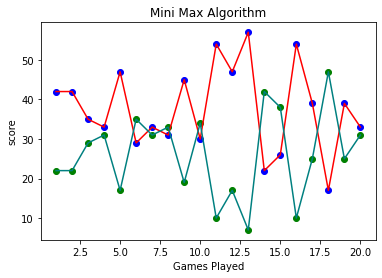

Playing the game of Othello using MiniMax and number_of_moves heuristic we won 14 Out of 20 games

The average is: 37.75, and the standard deviation is: 10.572960796295426


In [ ]:
iteration_axis = np.arange(1, games+1)
average = np.mean(player_one_final_score)
sd = np.std(player_two_final_score)
wins = 0
plt.xlim=(1,games)
plt.title("Mini Max Algorithm") 
plt.xlabel("Games Played") 
plt.ylabel("score") 
plt.plot(iteration_axis,player_one_final_score,color='r') 
plt.plot(iteration_axis,player_two_final_score,color='teal') 
plt.scatter(iteration_axis,player_one_final_score,color='b') 
plt.scatter(iteration_axis,player_two_final_score,color='g') 
plt.show()
for s in range(len(player_one_final_score)):
  if(player_one_final_score[s] > player_two_final_score[s]):
    wins += 1
print(f"Playing the game of Othello using MiniMax and {heuristic} heuristic we won {wins} Out of {games} games")
print(f"\nThe average is: {average}, and the standard deviation is: {sd}")